<a href="https://colab.research.google.com/github/Chirag314/EDA/blob/main/spaceship_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [3]:
#Helper functions

#Create table for missing data analysis
def draw_missing_data_table(df):
  total=df.isnull().sum().sort_values(ascending=False)
  percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
  return missing_data

In [4]:
#Plot learning curve
def plot_learning_curve(estimator, title, x,y,ylim=None, cv=None,n_jobs=1,train_sizes=np.linspace(.1,1,5)):
  plt.figure()
  plt.title(title)
  if ylim is not None:
    plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator,x,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    plt.grid()
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color='g')
    plt.plot(train_sizes,train_scores_mean,'o-',color='r',label="Training score")
    plt.plot(train_sizes,test_scores_mean,'o-',color='g',label='Validation score')
    plt.legend(loc="best")
    return plt

In [5]:
#plot validation curve
def plot_validation_curve(estimator, title,x,y,param_name,param_range,ylim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1,1,5)):
  train_scores,test_scores=validation_curve(estimator,x,y,param_name,param_range,cv)
  train_mean=np.mean(train_scores,axis=1)
  train_std=np.std(train_scores,axis=1)
  test_mean=np.mean(test_scores,axis=1)
  test_std=np.std(test_scores,axis=1)
  plt.plot(param_range,train_mean,color='r',marker='o',markersize=5,label='Training Score')
  plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,alpha=0.15,color='r')
  plt.plot(param_range,test_mean,color='g',linstyle='--',marker='s',markersize=5,label='Validation score')
  plt.fill_between(param_range, test_mean+test_std, test_mean-test_std,alpha=0.15,color='g')
  plt.grid()
  plt.xscale('log')
  plt.legend(loc='best')
  plt.xlabel('Parameter')
  plt.ylabel('Score')
  plt.ylim(ylim)

In [6]:
!pip install kaggle
!mkdir ~/.kaggle 
!cp train.csv ~/.kaggle
!cp test.csv ~/.kaggle
!chmod 600 ~/.kaggle/train.csv
!chmod 600 ~/.kaggle/test.csv

In [8]:
#import data
df=pd.read_csv('train.csv')
df_raw=df.copy()
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
#Descriptive statistics
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
#Analyse missing data
draw_missing_data_table(df)

,Total,Percent
CryoSleep,217,0.024963
ShoppingMall,208,0.023927
VIP,203,0.023352
HomePlanet,201,0.023122
Name,200,0.023007
Cabin,199,0.022892
VRDeck,188,0.021627
FoodCourt,183,0.021051
Spa,183,0.021051
Destination,182,0.020936


In [11]:
#minimum viable model
#Check data types
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [12]:
# We dont need passengerId for prediction purpose so we should drop it
df.drop('PassengerId',axis=1,inplace=True)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [13]:
#Define categorical variables
df['Cabin']=pd.Categorical(df['Cabin'])
df['Destination']=pd.Categorical(df['Destination'])
df['HomePlanet']=pd.Categorical(df['HomePlanet'])
df['CryoSleep']=pd.Categorical(df['CryoSleep'])
df['VIP']=pd.Categorical(df['VIP'])

In [14]:
#Drop name ,cabin
df.drop('Name',axis=1,inplace=True)
df.drop('Cabin',axis=1,inplace=True)
df.drop('ShoppingMall',axis=1,inplace=True)
df.drop('VRDeck',axis=1,inplace=True)
df.drop('FoodCourt',axis=1,inplace=True)
df.drop('Spa',axis=1,inplace=True)
df.drop('RoomService',axis=1,inplace=True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,False
1,Earth,False,TRAPPIST-1e,24.0,False,True
2,Europa,False,TRAPPIST-1e,58.0,True,False
3,Europa,False,TRAPPIST-1e,33.0,False,False
4,Earth,False,TRAPPIST-1e,16.0,False,True


In [15]:
#df['Age'] = df['Age'].fillna(df['Age'].mean()[0])

ma=df['Age'].mean()
ma
df['Age'].fillna(ma, inplace=True)
df['Age'].max()

79.0

In [16]:
#Transform categorical variables to dummy variabes
df=pd.get_dummies(df,drop_first=True)
df.head()

,Age,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,False,1,0,0,0,1,0
1,24.0,True,0,0,0,0,1,0
2,58.0,False,1,0,0,0,1,1
3,33.0,False,1,0,0,0,1,0
4,16.0,True,0,0,0,0,1,0


In [17]:
# Create test train dataset
x=df[df.loc[:,df.columns!='Transported'].columns]
y=df['Transported']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
#Debug
print('Inputs:\n',x_train.head())
print('Outputs:\n',y_train.head())

Inputs:
        Age  HomePlanet_Europa  HomePlanet_Mars  CryoSleep_True  \
5776  39.0                  0                1               1   
220   43.0                  0                0               0   
2398  24.0                  0                0               0   
5876  16.0                  0                0               0   
192   21.0                  0                0               0   

      Destination_PSO J318.5-22  Destination_TRAPPIST-1e  VIP_True  
5776                          0                        1         0  
220                           0                        1         0  
2398                          0                        1         0  
5876                          0                        1         0  
192                           0                        1         0  
Outputs:
 5776    False
220     False
2398    False
5876    False
192     False
Name: Transported, dtype: bool


In [19]:
draw_missing_data_table(x_train)

,Total,Percent
Age,0,0.0
HomePlanet_Europa,0,0.0
HomePlanet_Mars,0,0.0
CryoSleep_True,0,0.0
Destination_PSO J318.5-22,0,0.0
Destination_TRAPPIST-1e,0,0.0
VIP_True,0,0.0


In [20]:
df.dtypes

Age                          float64
Transported                     bool
HomePlanet_Europa              uint8
HomePlanet_Mars                uint8
CryoSleep_True                 uint8
Destination_PSO J318.5-22      uint8
Destination_TRAPPIST-1e        uint8
VIP_True                       uint8
dtype: object

In [21]:
draw_missing_data_table(df)

,Total,Percent
Age,0,0.0
Transported,0,0.0
HomePlanet_Europa,0,0.0
HomePlanet_Mars,0,0.0
CryoSleep_True,0,0.0
Destination_PSO J318.5-22,0,0.0
Destination_TRAPPIST-1e,0,0.0
VIP_True,0,0.0


In [22]:
#Fit logistic regression
#logreg=LogisticRegression()
#logreg.fit(x_train,y_train)
#Fit random forest
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
#model performance
scores=cross_val_score(rf,x_train,y_train,cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.715 +/- 0.017


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

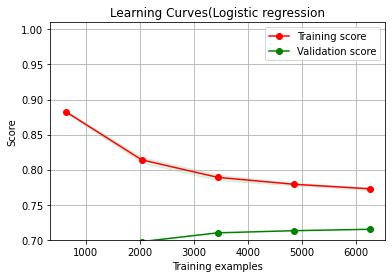

In [24]:
#Accessing model performance
title='Learning Curves(Logistic regression'
cv=10
plot_learning_curve(rf,title, x_train,y_train,ylim=(0.7,1.01),cv=cv,n_jobs=1)

In [26]:
# Predict the data
test=pd.read_csv("test.csv")
test.head()
test1=test[['PassengerId']]
test1.head()

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01


In [27]:
#Drop name ,cabin
test.drop('Name',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)
test.drop('ShoppingMall',axis=1,inplace=True)
test.drop('VRDeck',axis=1,inplace=True)
test.drop('FoodCourt',axis=1,inplace=True)
test.drop('Spa',axis=1,inplace=True)
test.drop('RoomService',axis=1,inplace=True)
test_x=test
test.head()


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False
2,0019_01,Europa,True,55 Cancri e,31.0,False
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False


In [28]:
ma=df['Age'].mean()
ma
test_x['Age'].fillna(ma, inplace=True)



In [29]:
draw_missing_data_table(test_x)

,Total,Percent
CryoSleep,93,0.021744
VIP,93,0.021744
Destination,92,0.021510
HomePlanet,87,0.020341
PassengerId,0,0.000000
Age,0,0.000000


In [30]:
test_x.drop('PassengerId',axis=1,inplace=True)
test_x.dtypes

HomePlanet      object
CryoSleep       object
Destination     object
Age            float64
VIP             object
dtype: object

In [31]:
#Define categorical variables

test_x['Destination']=pd.Categorical(test_x['Destination'])
test_x['HomePlanet']=pd.Categorical(test_x['HomePlanet'])
test_x['CryoSleep']=pd.Categorical(test_x['CryoSleep'])
test_x['VIP']=pd.Categorical(test_x['VIP'])

In [32]:
#Transform categorical variables to dummy variabes
test_x=pd.get_dummies(test_x,drop_first=True)
test_x.head()

,Age,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,27.0,0,0,1,0,1,0
1,19.0,0,0,0,0,1,0
2,31.0,1,0,1,0,0,0
3,38.0,1,0,0,0,1,0
4,20.0,0,0,0,0,1,0


In [33]:
prd=rf.predict(test_x)
prd

array([ True, False,  True, ...,  True,  True, False])

In [34]:
#op=pd.concat(test[["PassengerId"]],prd)
test1['Transported']=prd
test1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [35]:
test1.to_csv("Submission.csv", index=False)